In [ ]:
import pandas as pd # Загружаем модуль Pandas
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
from matplotlib import projections # Для отображения 3х мерного графика
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

import numpy as np # Импортируем библиотеку numpy
from sklearn.preprocessing import StandardScaler # Импортируем библиотеку StandardScaler для получения стандартного распределения набора данных
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering # Импортируем модули для кластеризации
from sklearn import cluster

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Работа с базой

In [ ]:
# Прочитаем данные из файла
df = pd.read_excel('/content/drive/MyDrive/Vmeste/2_5299045948754762177.xlsx')
df

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,11:18:45.108 -> AcX = 16648 | AcY = 2272 | AcZ...
2,NaN,11:18:45.272 -> AcX = 16812 | AcY = 2084 | AcZ...
3,NaN,11:18:45.503 -> AcX = 16828 | AcY = 2860 | AcZ...
4,NaN,11:18:45.691 -> AcX = 16408 | AcY = 3528 | AcZ...
...,...,...
29680,NaN,AcX = 16292 | AcY = 2168 | AcZ = -836 | Tmp = ...
29681,NaN,AcX = 17036 | AcY = 1220 | AcZ = -220 | Tmp = ...
29682,NaN,AcX = 16352 | AcY = 4808 | AcZ = 864 | Tmp = 3...
29683,NaN,AcX = 16808 | AcY = 3436 | AcZ = 156 | Tmp = 3...


## Парсим базу

In [ ]:
# Удалим ненужный столбец, а так же первую и последнюю строку
df.drop(columns = 'Unnamed: 0', inplace=True)
df.drop(axis = 0, index = [0,29684], inplace=True)
df

,Unnamed: 1
1,11:18:45.108 -> AcX = 16648 | AcY = 2272 | AcZ...
2,11:18:45.272 -> AcX = 16812 | AcY = 2084 | AcZ...
3,11:18:45.503 -> AcX = 16828 | AcY = 2860 | AcZ...
4,11:18:45.691 -> AcX = 16408 | AcY = 3528 | AcZ...
5,11:18:45.925 -> AcX = 16572 | AcY = 2328 | AcZ...
...,...
29679,AcX = 16700 | AcY = 4076 | AcZ = 292 | Tmp = 3...
29680,AcX = 16292 | AcY = 2168 | AcZ = -836 | Tmp = ...
29681,AcX = 17036 | AcY = 1220 | AcZ = -220 | Tmp = ...
29682,AcX = 16352 | AcY = 4808 | AcZ = 864 | Tmp = 3...


In [ ]:
# Посмотрим как выглядит строка
df.values[0]

array(['11:18:45.108 -> AcX = 16648 | AcY = 2272 | AcZ = -580 | Tmp = 29.47 | GyX = -167 | GyY = 174 | GyZ = -21'],
      dtype=object)

In [ ]:
# Сделаем преобразования с данными
list = ['AcX', 'AcY', 'AcZ', 'Tmp', 'GyX', 'GyY', 'GyZ', '=', ' '] # Список значений которые необходимо удалить из строк
b = []
for i in range(1, len(df)):                                        # Пройдемся по каждой строчке и заменим символы
  a = df['Unnamed: 1'][i]
  for i in list:
    a = a.replace(i, '')

  a = a.replace('->', '|').split('|')                              # Сделаем сплит
  if len(a[0]) == 12:                                              # Данные по времени отсутствую в большинстве строках, поэтому мы их удаляем
    a = a[1:]
    
  b.append(a)                                                      # Создадим новый список с добавлением туда обработанной информаци
print(b)  

[['16648', '2272', '-580', '29.47', '-167', '174', '-21'], ['16812', '2084', '-272', '29.42', '-99', '103', '-5'], ['16828', '2860', '-16', '29.33', '-113', '113', '-329'], ['16408', '3528', '-44', '29.52', '-279', '-44', '-275'], ['16572', '2328', '-496', '29.47', '-173', '162', '-84'], ['16596', '2940', '-348', '29.57', '-536', '0', '37'], ['16768', '2336', '-96', '29.57', '-121', '114', '-166'], ['16500', '3108', '-280', '29.52', '-252', '3', '-286'], ['16836', '2448', '-200', '29.42', '-200', '124', '-240'], ['16464', '2920', '-24', '29.57', '-84', '3', '-348'], ['16976', '2424', '16', '29.61', '-99', '158', '-90'], ['16436', '3180', '-272', '29.57', '-240', '-3', '-283'], ['16616', '2508', '-184', '29.47', '-202', '126', '-252'], ['17108', '1332', '68', '29.52', '79', '65', '-80'], ['17008', '2304', '-96', '29.52', '-70', '176', '-39'], ['16624', '2860', '-256', '29.52', '-255', '-4', '-278'], ['16632', '2492', '-180', '29.52', '-205', '117', '-258'], ['16880', '2432', '-36', '29.

In [ ]:
# Новый DataFrame
columns = ['AcX', 'AcY', 'AcZ', 'Tmp', 'GyX', 'GyY', 'GyZ']
df_new = pd.DataFrame(b, columns = columns)
df_new

,AcX,AcY,AcZ,Tmp,GyX,GyY,GyZ
0,16648,2272,-580,29.47,-167,174,-21
1,16812,2084,-272,29.42,-99,103,-5
2,16828,2860,-16,29.33,-113,113,-329
3,16408,3528,-44,29.52,-279,-44,-275
4,16572,2328,-496,29.47,-173,162,-84
...,...,...,...,...,...,...,...
29677,17372,2172,224,30.22,96,323,-459
29678,16700,4076,292,30.18,-415,-171,-441
29679,16292,2168,-836,30.18,-189,155,367
29680,17036,1220,-220,30.18,29,86,-397


In [ ]:
# Сохраним новый файл
df_new.to_csv('/content/drive/MyDrive/Vmeste/Data_clean.csv',index=False) 

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Vmeste/Data_clean.csv')
df_new

,AcX,AcY,AcZ,Tmp,GyX,GyY,GyZ
0,16648,2272,-580,29.47,-167,174,-21
1,16812,2084,-272,29.42,-99,103,-5
2,16828,2860,-16,29.33,-113,113,-329
3,16408,3528,-44,29.52,-279,-44,-275
4,16572,2328,-496,29.47,-173,162,-84
...,...,...,...,...,...,...,...
29677,17372,2172,224,30.22,96,323,-459
29678,16700,4076,292,30.18,-415,-171,-441
29679,16292,2168,-836,30.18,-189,155,367
29680,17036,1220,-220,30.18,29,86,-397


## Проверка таблицы на пропуски

In [ ]:
# Cчитает сколько всего непустых записей в каждом столбце
df_new.count()

AcX    29682
AcY    29682
AcZ    29682
Tmp    29682
GyX    29682
GyY    29682
GyZ    29682
dtype: int64

In [ ]:
# Посмотрим тип каждого столбца и занимаемую память
df_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29682 entries, 0 to 29681
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AcX     29682 non-null  object
 1   AcY     29682 non-null  object
 2   AcZ     29682 non-null  object
 3   Tmp     29682 non-null  object
 4   GyX     29682 non-null  object
 5   GyY     29682 non-null  object
 6   GyZ     29682 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


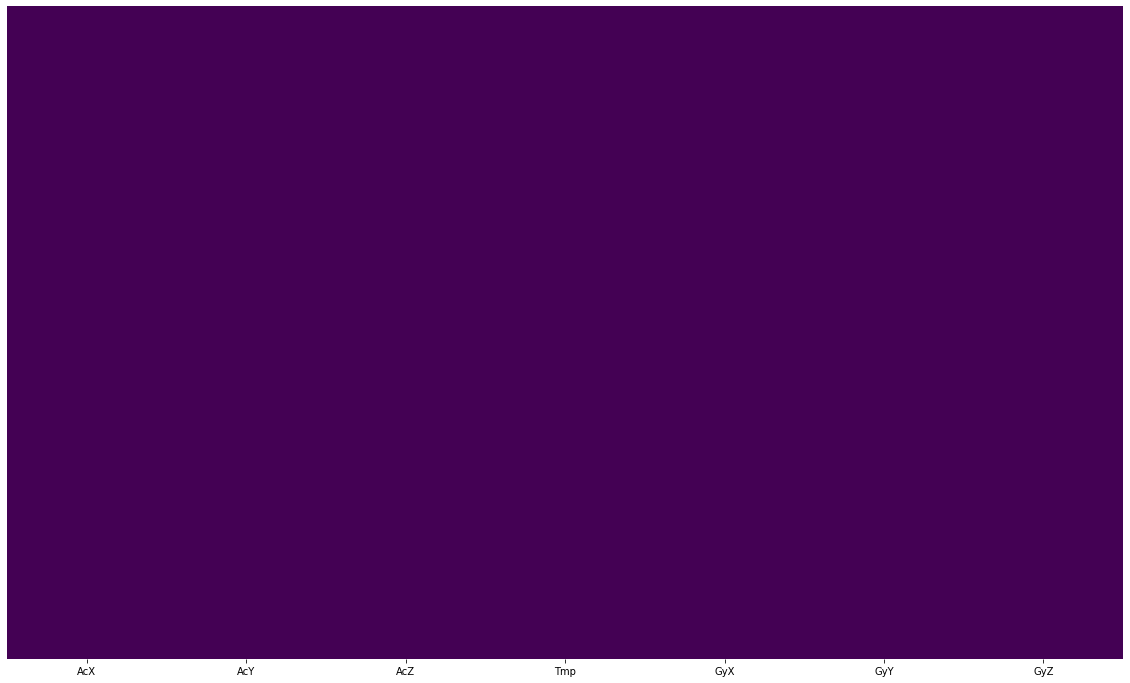

In [ ]:
# График который покажет есть ли пропуски
fig, ax = plt.subplots(figsize=(20,12)) 
sns_heatmap = sns.heatmap(df_new.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show()

## Поиск закономерностей

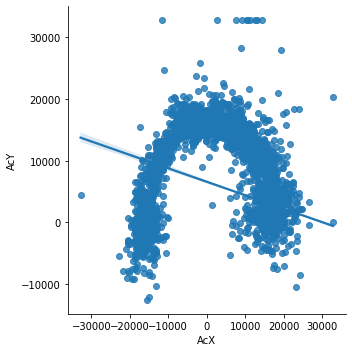

In [ ]:
# Посмотрим связь между координатами AcX и  AcY
sns.lmplot(data=df_new, x=df_new.columns[0], y=df_new.columns[1])                                                                         
plt.show()

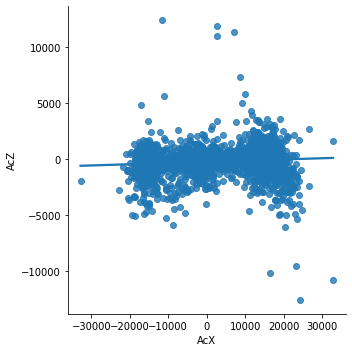

In [ ]:
# Посмотрим связь между координатами AcX и  AcZ
sns.lmplot(data=df_new, x=df_new.columns[0], y=df_new.columns[2])                                                                         
plt.show()

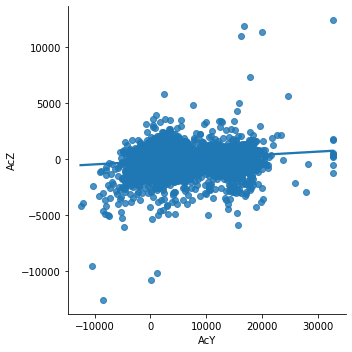

In [ ]:
# Посмотрим связь между координатами AcY и  AcZ
sns.lmplot(data=df_new, x=df_new.columns[1], y=df_new.columns[2])                                                                                                                                                 
plt.show()

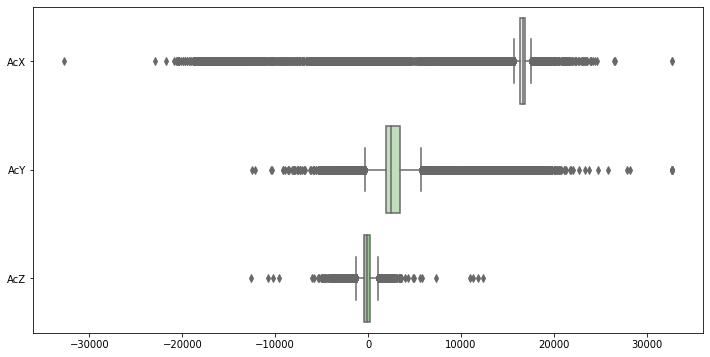

In [ ]:
plt.figure(figsize=(12,6))

# Посмотрим средний, нижний и верхний квантили, 
# Минимальное и максимальное значение выборки и выбросы
sns.boxplot(data=df_new.drop(['Tmp', 'GyX', 'GyY', 'GyZ'], axis=1), palette=sns.color_palette('Greens'), orient='h')
plt.show()

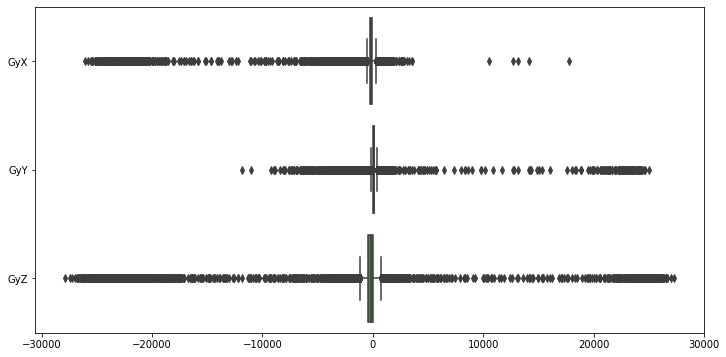

In [ ]:
plt.figure(figsize=(12,6))

# Посмотрим средний, нижний и верхний квантили, 
# Минимальное и максимальное значение выборки и выбросы
sns.boxplot(data=df_new.drop(['Tmp', 'AcX', 'AcY', 'AcZ'], axis=1),  orient='h')
plt.show()

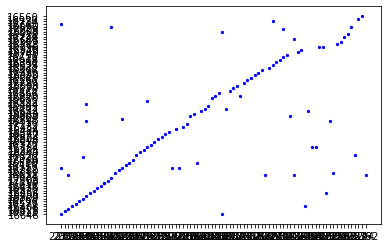

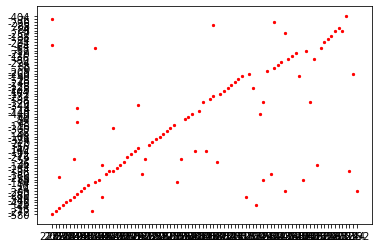

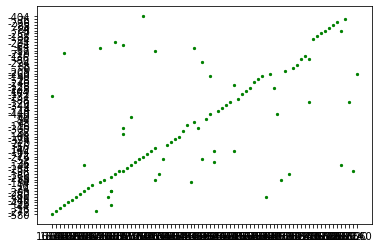

In [ ]:
# Построение и вывод графика по координатам
plt.scatter( df_new['AcY'][0:100], df_new['AcX'][0:100], s=5, c="b", marker='o')
plt.show()
plt.scatter( df_new['AcY'][0:100], df_new['AcZ'][0:100] , s=5, c="r", marker='o')
plt.show()
plt.scatter( df_new['AcX'][0:100], df_new['AcZ'][0:100], s=5, c="g", marker='o')
plt.show()

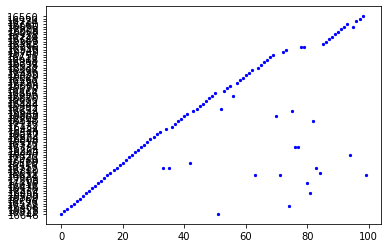

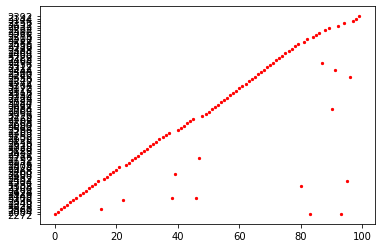

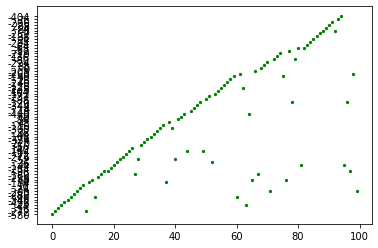

In [ ]:
# Построение и вывод графика изменение координат координат
plt.scatter( df_new.index[0:100], df_new['AcX'][0:100], s=5, c="b", marker='o')
plt.show()
plt.scatter( df_new.index[0:100], df_new['AcY'][0:100], s=5, c="r", marker='o')
plt.show()
plt.scatter( df_new.index[0:100], df_new['AcZ'][0:100], s=5, c="g", marker='o')
plt.show()

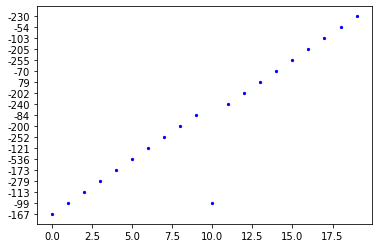

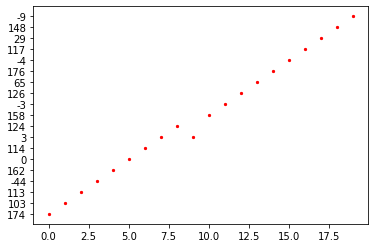

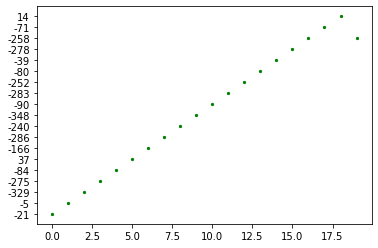

In [ ]:
# Построение и вывод графика изменение ускорения
plt.scatter( df_new.index[0:20], df_new['GyX'][0:20], s=5, c="b", marker='o')
plt.show()
plt.scatter( df_new.index[0:20], df_new['GyY'][0:20], s=5, c="r", marker='o')
plt.show()
plt.scatter( df_new.index[0:20], df_new['GyZ'][0:20], s=5, c="g", marker='o')
plt.show()

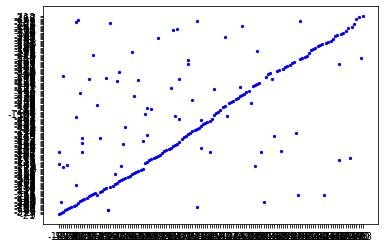

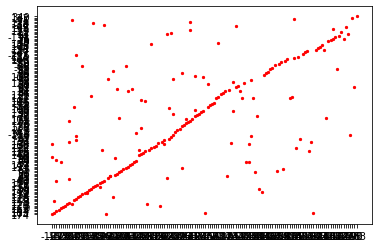

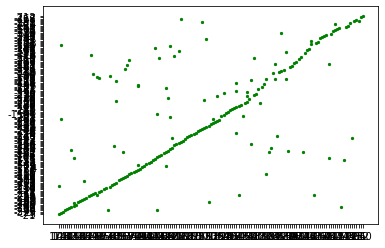

In [ ]:
# Построение и вывод графика изменеие ускорения
plt.scatter( df_new['GyX'][0:200], df_new['GyZ'][0:200], s=5, c="b", marker='o')
plt.show()
plt.scatter( df_new['GyX'][0:200], df_new['GyY'][0:200], s=5, c="r", marker='o')
plt.show()
plt.scatter( df_new['GyY'][0:200], df_new['GyZ'][0:200], s=5, c="g", marker='o')
plt.show()

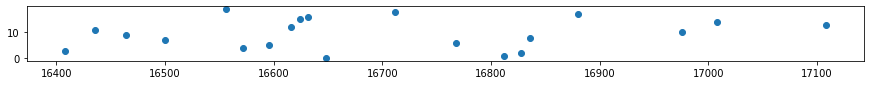

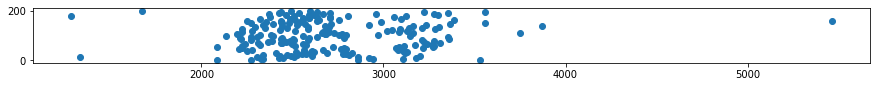

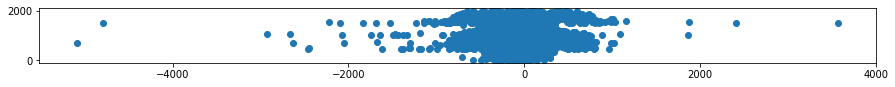

In [ ]:
plt.figure(figsize=(15, 1))
plt.plot(df_new['AcX'][0:20], df_new.index[0:20], 'o')                     
plt.show()

plt.figure(figsize=(15, 1))
plt.plot(df_new['AcY'][0:200], df_new.index[0:200], 'o')                      
plt.show()

plt.figure(figsize=(15, 1))
plt.plot(df_new['AcZ'][0:2000], df_new.index[0:2000], 'o')                     
plt.show()

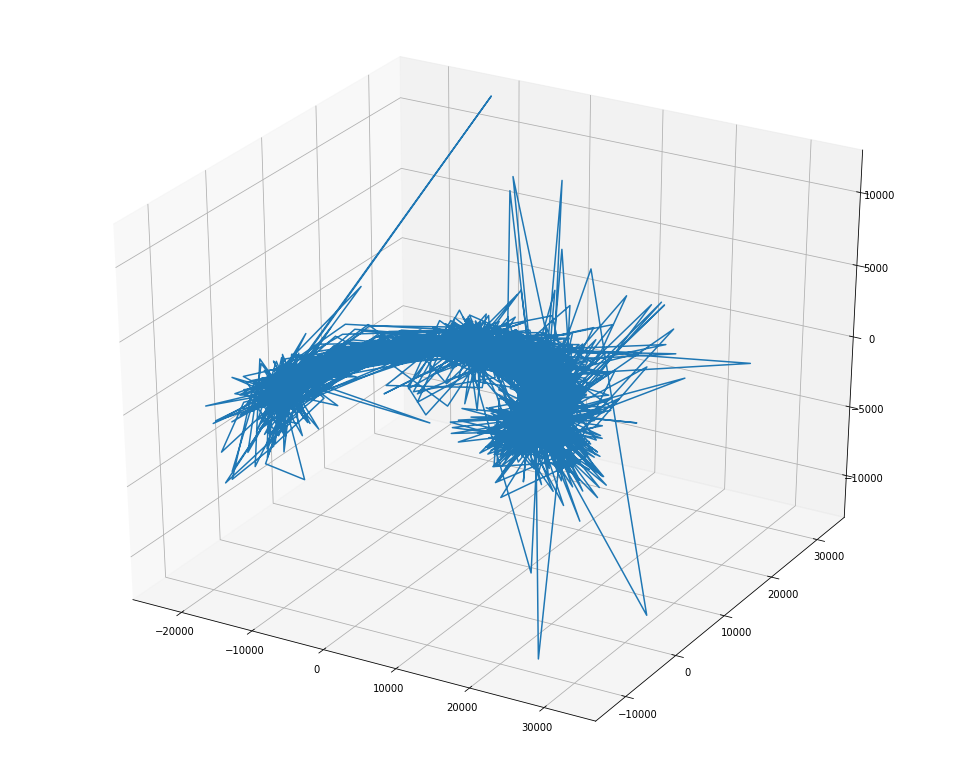

In [ ]:
# Отобразим в 3х мерном графике значения движения
fig = plt.figure(figsize=(17,14))
ax_3d = fig.add_subplot(projection='3d')

ax_3d.plot(df_new['AcX'][0:20000], df_new['AcY'][0:20000], df_new['AcZ'][0:20000])
plt.show()

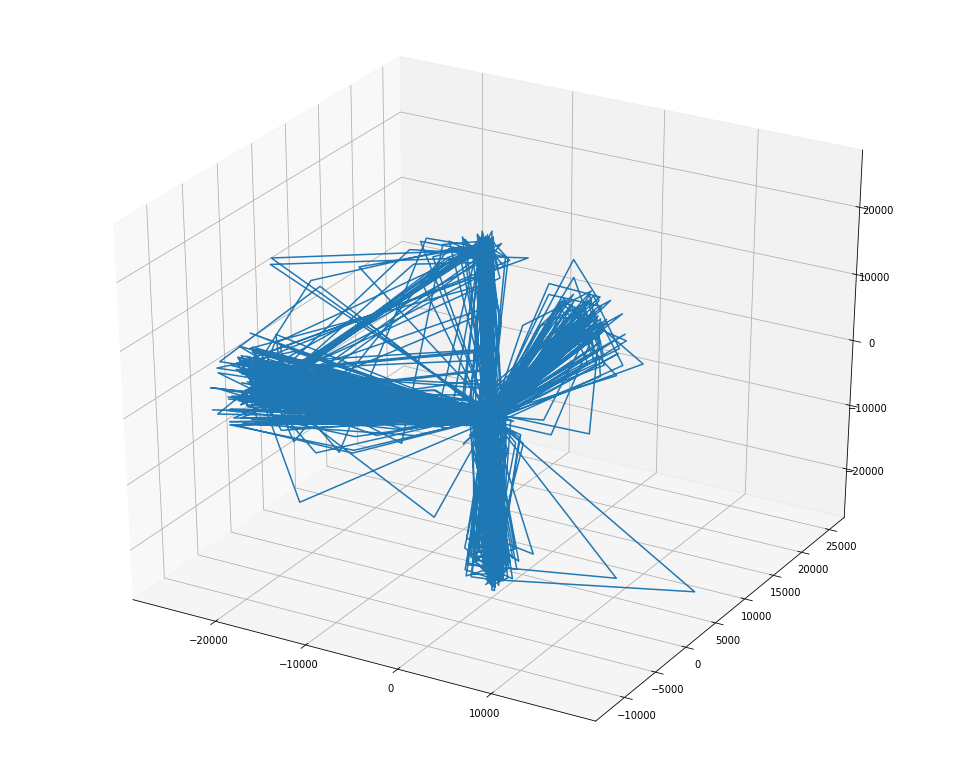

In [ ]:
# Отобразим в 3х мерном графике значения ускорения
fig = plt.figure(figsize=(17,14))
ax_3d = fig.add_subplot(projection='3d')

ax_3d.plot(df_new['GyX'][0:20000], df_new['GyY'][0:20000], df_new['GyZ'][0:20000])
plt.show()

# Кластеризация базы

In [ ]:
df_new

,AcX,AcY,AcZ,Tmp,GyX,GyY,GyZ
0,16648,2272,-580,29.47,-167,174,-21
1,16812,2084,-272,29.42,-99,103,-5
2,16828,2860,-16,29.33,-113,113,-329
3,16408,3528,-44,29.52,-279,-44,-275
4,16572,2328,-496,29.47,-173,162,-84
...,...,...,...,...,...,...,...
29677,17372,2172,224,30.22,96,323,-459
29678,16700,4076,292,30.18,-415,-171,-441
29679,16292,2168,-836,30.18,-189,155,367
29680,17036,1220,-220,30.18,29,86,-397


## Создание выборки

In [ ]:
# Создаем экземпляр класса StandardScaler для стандартного распределения
dataScaler = StandardScaler()      
# Применим метод fit_transform для получения набора данных dataScaled              
dataScaled = dataScaler.fit_transform(df_new.values) 
dataScaled

array([[ 0.30024974, -0.31242448, -0.78276062, ...,  0.10851467,
         0.03306664,  0.04109288],
       [ 0.32343133, -0.36337327, -0.27220297, ...,  0.13820014,
        -0.01346152,  0.04469493],
       [ 0.32569294, -0.15307402,  0.15215664, ...,  0.13208842,
        -0.00690826, -0.02824657],
       ...,
       [ 0.24992872, -0.34060892, -1.20712022, ...,  0.09891055,
         0.02061544,  0.12844257],
       [ 0.35509399, -0.5975209 , -0.18600492, ...,  0.19407866,
        -0.02460206, -0.04355528],
       [ 0.25840979,  0.37484215,  1.61089279, ...,  0.17879938,
        -0.09930924, -0.08385321]])

In [ ]:
# Проверяем размерность
dataScaled.shape

(29682, 7)

## Кластеризация алгоритм K-Means

In [ ]:
# Создаем объект KMeans с указанным количеством кластеров
model1 = KMeans(n_clusters=2)
# Произвдим кластеризацию данных 
model1.fit(dataScaled)
# Результат кластеризации
predictions1 = model1.predict(dataScaled)
# Вывод результатов кластеризации
print(predictions1[:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

In [ ]:
print('Колличество значений равных 1 ', len(np.where(predictions1==1)[0]))
print('Колличество значений равных 0 ', len(np.where(predictions1==0)[0]))

Колличество значений равных 1  2874
Колличество значений равных 0  26808


In [ ]:
values1 = pd.DataFrame(predictions1)
values1

In [ ]:
# Сохраним значения в файл
values1.to_csv('/content/drive/MyDrive/Vmeste/values_K-Means.csv',index=False) 

##  Алгоритм Agglomerative Clastering

In [ ]:
# Создание модели алгоритма AgglomerativeClustering                                                                    
model2 = AgglomerativeClustering(n_clusters=2)
# Вычисление и результат кластеризации
predictions2 = model2.fit_predict(dataScaled)
# Вывод результатов кластеризации
print(predictions2[:1000])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [ ]:
print('Колличество значений равных 1 ', len(np.where(predictions2==1)[0]))
print('Колличество значений равных 0 ', len(np.where(predictions2==0)[0]))

Колличество значений равных 1  26353
Колличество значений равных 0  3329


In [ ]:
values2 = pd.DataFrame(predictions2)
values2

,0
0,1
1,1
2,1
3,1
4,1
...,...
29677,1
29678,1
29679,1
29680,1


In [ ]:
# Сохраним значения в файл
values2.to_csv('/content/drive/MyDrive/Vmeste/values_Agg.csv',index=False) 

## Алгоритм DBSCAN

In [ ]:
# Создание модели алгоритма DBSCAN                                                                    
model3 = DBSCAN(eps=0.5, min_samples=2)
# Вычисление и результат кластеризации
predictions3 = model3.fit_predict(dataScaled)
# Вывод результатов кластеризации
print(predictions3[:1000])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
print('Колличество значений равных 0 ', len(np.where(predictions3==0)[0]))
print('Остальные значения ', len(predictions3) - len(np.where(predictions3==0)[0]) )

Колличество значений равных 0  26083
Остальные значения  3599


In [ ]:
# Так как наш метод дает больше 2х кластеров, то все кластеры которые не относятся к 0 мы присваиваем значение 1
for i in range(len(predictions3)):
  if predictions3[i] != 0:
    predictions3[i] = 1
predictions3[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
values3 = pd.DataFrame(predictions3)
values3

,0
0,0
1,0
2,0
3,0
4,0
...,...
29677,0
29678,0
29679,0
29680,0


In [ ]:
# Сохраним значения в файл
values3.to_csv('/content/drive/MyDrive/Vmeste/values_DBSCAN.csv',index=False) 

## Алгоритм SpectralClustering

In [ ]:
# Создание модели алгоритма SpectralClustering                                                                    
model4 = SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors")

# Вычисление и результат кластеризации
predictions4 = model4.fit_predict(dataScaled)
# Вывод результатов кластеризации
print(predictions4[:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

In [ ]:
print('Колличество значений равных 1 ', len(np.where(predictions4==1)[0]))
print('Колличество значений равных 0 ', len(np.where(predictions4==0)[0]))

Колличество значений равных 1  3196
Колличество значений равных 0  26486


In [ ]:
values4 = pd.DataFrame(predictions4)
values4

,0
0,0
1,0
2,0
3,0
4,0
...,...
29677,0
29678,0
29679,0
29680,0


In [ ]:
# Сохраним значения в файл
values4.to_csv('/content/drive/MyDrive/Vmeste/values_SpectralClustering.csv',index=False) 

## Отобразим диаграммы

In [ ]:
values1 = pd.read_csv('/content/drive/MyDrive/Vmeste/values_K-Means.csv')
values2 = pd.read_csv('/content/drive/MyDrive/Vmeste/values_Agg.csv')
values3 = pd.read_csv('/content/drive/MyDrive/Vmeste/values_DBSCAN.csv')
values4 = pd.read_csv('/content/drive/MyDrive/Vmeste/values_SpectralClustering.csv')

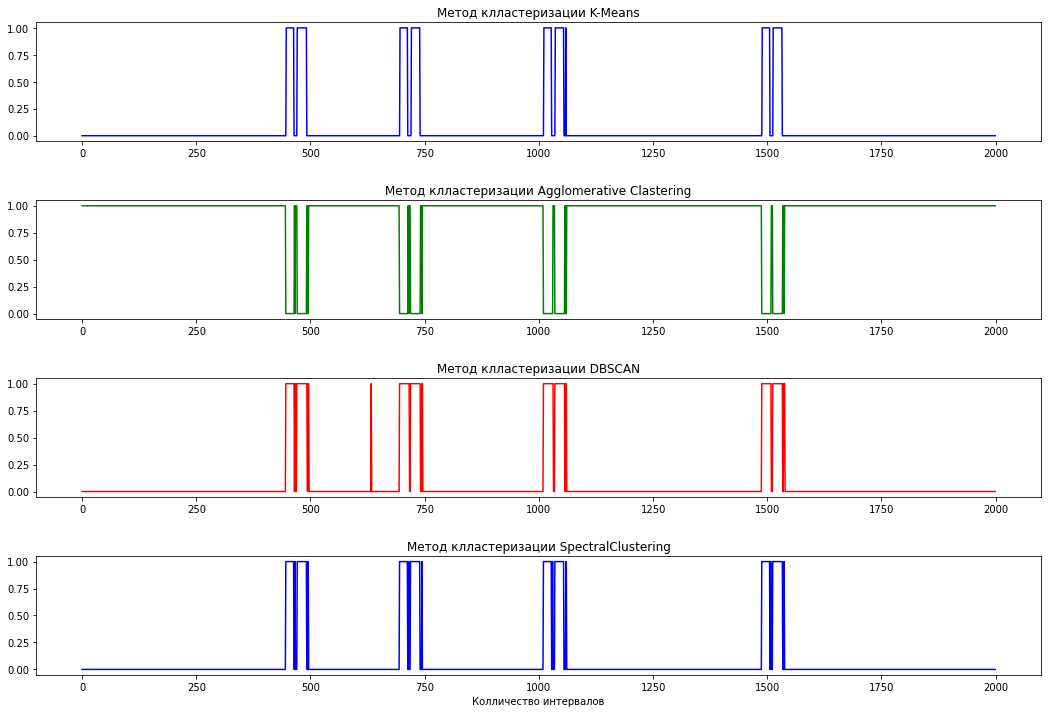

In [ ]:
a = 0    # Начало графика
b = 2000 # Конец графика
plt.figure(1, figsize=(18, 12)) # Указываем размер графика

plt.subplot(4, 1, 1)
plt.title('Метод клластеризации K-Means')
plt.plot(values1.index[a:b], values1[a:b], 'b')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show

plt.subplot(4, 1, 2)
plt.title('Метод клластеризации Agglomerative Clastering')
plt.plot(values2.index[a:b], values2[a:b], 'g')
plt.show

plt.subplot(4, 1, 3)
plt.title('Метод клластеризации DBSCAN')
plt.plot(values3.index[a:b], values3[a:b], 'r')
plt.show

plt.subplot(4, 1, 4)
plt.title('Метод клластеризации SpectralClustering')
plt.plot(values4.index[a:b], values4[a:b], 'b')
plt.xlabel('Колличество интервалов')
plt.show
plt.savefig('/content/drive/MyDrive/Vmeste/saved_figure.png')